In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from tensorflow.keras.datasets import mnist

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
image = X_train[0]

In [46]:
image.shape

(28, 28)

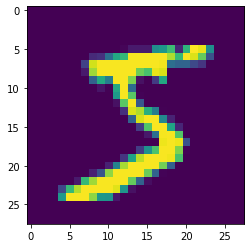

In [47]:
plt.imshow(image)

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
from tensorflow.keras.utils import to_categorical

In [50]:
y_train.shape

(60000,)

In [51]:
y_train = to_categorical(y_train, num_classes=10)

In [52]:
y_train.shape

(60000, 10)

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [54]:
y_test = to_categorical(y_test, num_classes=10)

In [55]:
y_test.shape

(10000, 10)

In [56]:
image.max()

255

In [57]:
image.min()

0

In [58]:
X_train = X_train / 255
X_test = X_test / 255

In [59]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [60]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [61]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [63]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
          
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [27]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1364 - accuracy: 0.9591 - val_loss: 0.0634 - val_accuracy: 0.9788
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0546 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0397 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0477 - val_accuracy: 0.9868


In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.136379,0.959117,0.063396,0.9788
1,0.047666,0.985583,0.054551,0.9816
2,0.029685,0.990283,0.039718,0.9863
3,0.021336,0.992983,0.035941,0.9888
4,0.014793,0.995167,0.047690,0.9868


<AxesSubplot:>

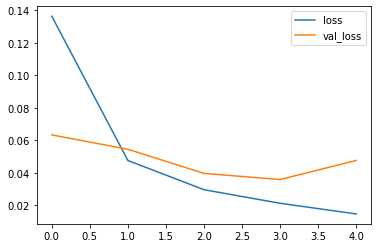

In [31]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

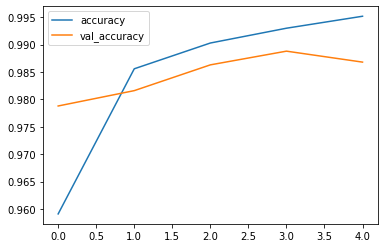

In [32]:
metrics[['accuracy', 'val_accuracy']].plot()

In [33]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [35]:
from tensorflow.math import argmax

In [66]:
y_test = argmax(y_test, axis=1)

In [67]:
y_test.shape, y_pred.shape

(TensorShape([10000]), (10000,))

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test_nor.numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

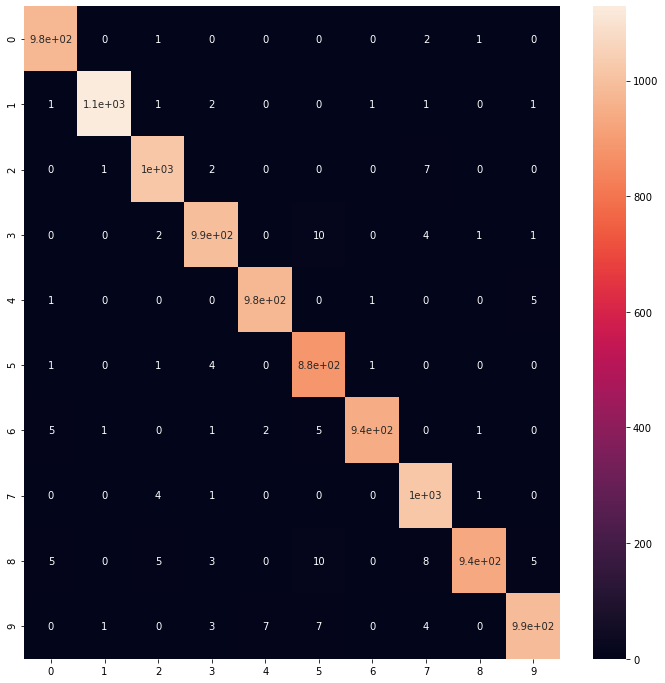

In [78]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test_nor.numpy(), y_pred), annot=True)

In [79]:
img = X_test[0]

TypeError: Invalid shape (1, 28, 28, 1) for image data

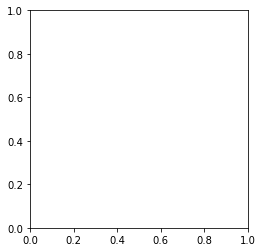

In [80]:
plt.imshow(img.reshape(1, 28, 28, 1))